# Setup
The switching of folders is not as easy as in spyder. I had to do it like this, but sometimes the importing changes the working directory back to /lib/pupil/...


In [2]:
import os
print(os.getcwd())
if os.getcwd()[-4:] != 'code':
    try:
        os.chdir('./code')
    except:
        os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code ')
            

/net/store/nbp/users/behinger/projects/etcomp/code


In [3]:
%load_ext autoreload
%autoreload 2

## Importing libraries

In [4]:
import functions.add_path


import functions.plotnine_theme
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import *

import functions.et_preprocess as preprocess
import functions.et_helper as  helper
import functions.et_make_df as  make_df
import functions.et_condition_df as condition_df

/home/student/b/behinger/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


reached exception:pyaudio
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:glfw.GLFW_KEY_SPACE
reached exception:glfw.GLFW_KEY_F
reached exception:glfw.glfwSetKeyCallback
reached exception:fingertip_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
reached exception:optimization_calibration
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:glfw.GLFW_KEY_SPACE
reached exception:glfw.GLFW_KEY_F
reached exception:glfw.glfwSetKeyCallback
reached exception:fingertip_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
reached exception:optimization_calibration


These are the analysis library/scripts

In [5]:
import BLINK
#import SMOOTHPURSUIT

# Load Data

In [6]:
# loop over the foldernames (subjectnames)
# restricted to subjects that we do not exclude from analysis
# also loop over the et
foldernames       = helper.get_subjectnames('/net/store/nbp/projects/etcomp/')
#TODO find out whats wrong with vp3 and vp12 and fix and then use vp3 again!!
rejected_subjects = ['pilot', 'log_files', 'surface', '007', 'VP8', 'VP21','VP7','all_preprocessed']
subjectnames      = [subject for subject in foldernames if subject not in rejected_subjects]


In [13]:
datapath = '/net/store/nbp/projects/etcomp/'
algorithm = ['hmm_']
etsamples = pd.DataFrame()
etmsgs= pd.DataFrame()
etevents = pd.DataFrame()
for subject in subjectnames:
    for et in ['el','pl']:
        for outputtype in algorithm:
            print('loading subject %s with et %s'%(subject,et))
            try:
                elsamples, elmsgs, elevents = helper.load_file(et,subject,datapath=datapath,outputprefix=outputtype)
            except:
                print('warning subject %s et %s not found'%(subject,et))
                continue
            t0 = elmsgs.query("condition=='Instruction'&exp_event=='BEGINNING_start'").msg_time.values
            if len(t0)!=1:
                raise error
            elsamples.smpl_time = elsamples.smpl_time - t0
            elmsgs.msg_time= elmsgs.msg_time - t0
            elevents.start_time = elevents.start_time- t0
            elevents.end_time = elevents.end_time- t0

            if outputtype=='hmm_':
                outputtype='hmm'

            etsamples = pd.concat([etsamples,elsamples.assign(subject=subject,eyetracker=et,algorithm=outputtype)],ignore_index=True, sort=False)
            etmsgs    = pd.concat([etmsgs,      elmsgs.assign(subject=subject,eyetracker=et,algorithm=outputtype)],ignore_index=True, sort=False)
            etevents  = pd.concat([etevents,  elevents.assign(subject=subject,eyetracker=et,algorithm=outputtype)],ignore_index=True, sort=False)

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
File b'/net/store/nbp/projects/etcomp/VP20/preprocessed/hmm_el_cleaned_samples.csv' does not exist
warning subject VP20 et el not found
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading 

In [14]:
print(etsamples.subject.unique())
print("There are %i subjects"%(etsamples.subject.unique().shape))

['VP1' 'VP2' 'VP3' 'VP4' 'VP11' 'VP12' 'VP14' 'VP15' 'VP19' 'VP20' 'VP22'
 'VP23' 'VP24' 'VP25']
There are 14 subjects


## Blink Analysis

In [15]:
#%% Do Blink Analysis
blink= condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition="BLINK")

Eyetracker: el    Subject: VP1 
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
Eyetracker: pl    Subject: VP1 
Eyetracker: el    Subject: VP2 
Eyetracker: pl    Subject: VP2 
Eyetracker: el    Subject:

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_jitter : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


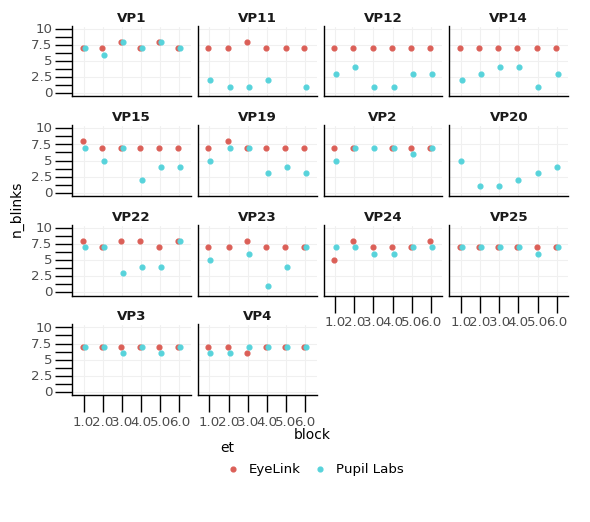

In [16]:
BLINK.plot_count(blink,option="facet_subjects")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 1 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_jitter : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


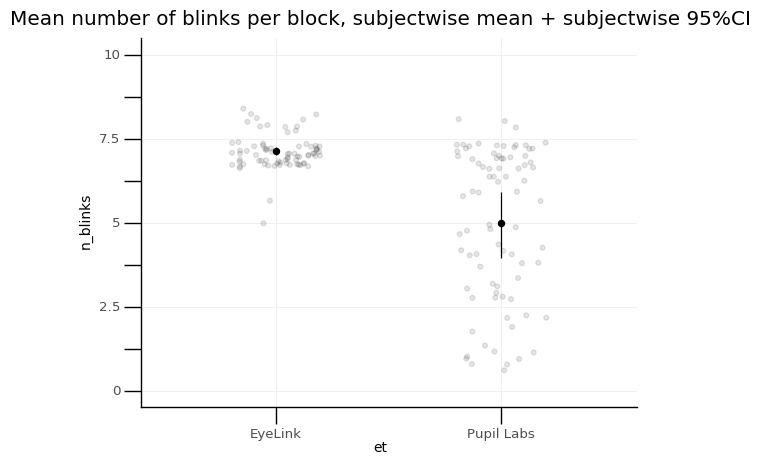

In [18]:
BLINK.plot_count(blink)

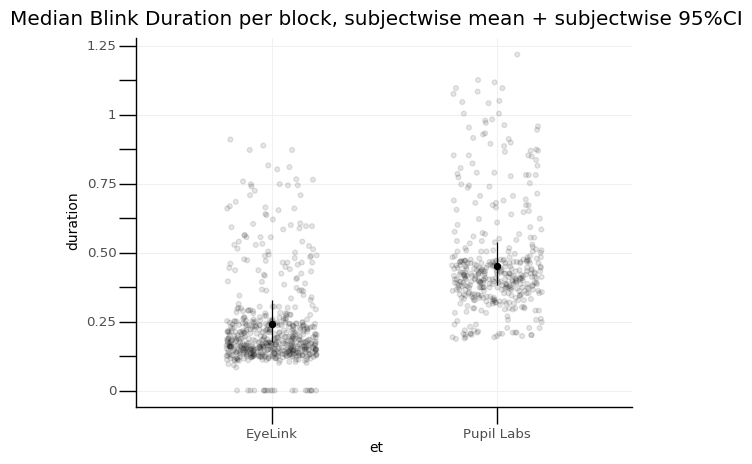

In [19]:
BLINK.plot_duration(blink)

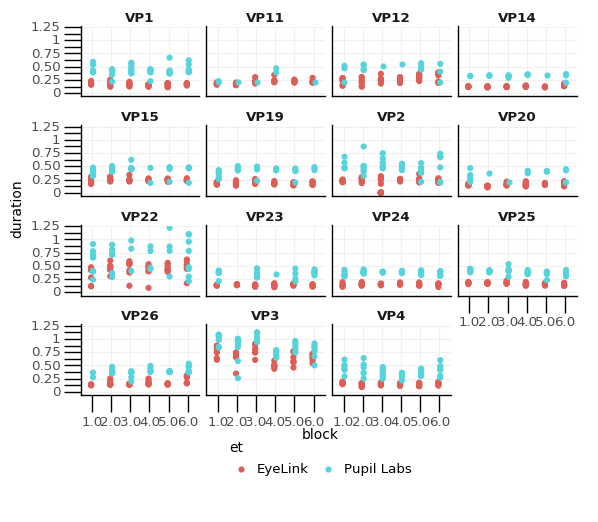

In [69]:
BLINK.plot_duration(blink,option="facet_subjects")

In [20]:
#%% Do Smooth Pursuit Analysis
smooth = condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition="SMOOTHPURSUIT")

CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP1 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP1 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP2 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP2 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP3 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP3 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP4 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP4 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP11 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP11 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP12 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP12 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP14 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP14 
CRITICAL:functions.et_condition_df:Eyetracker: el    Sub

In [51]:
smooth_smooth  = smooth.query("type=='smoothpursuit' & condition=='SMOOTH' & exp_event=='trialstart'")
smooth_saccade = smooth.query("type=='saccade'       & condition=='SMOOTH' & exp_event=='trialstart'")

In [78]:
# Smooth Pursuit Init Times
smooth_smooth_first = smooth_smooth.groupby(["subject","block","trial"],as_index=False).first()
smooth_smooth_first.loc[:,'onsettime'] = smooth_smooth_first.start_time-smooth_smooth_first.msg_time

In [80]:
ggplot(smooth_smooth_first,aes(x="et",y="onsettime",color="et"))+stat_summary()

In [105]:
select = "subject=='VP2'"

start = smooth_smooth.query(select+"&block==1").msg_time.iloc[0]

In [106]:
dur = 10#s
tmpdata = etsamples.query(select+"&smpl_time>%i & smpl_time <%i"%(start,start+dur))
tmpdata.eyetracker.unique()

array(['el', 'pl'], dtype=object)

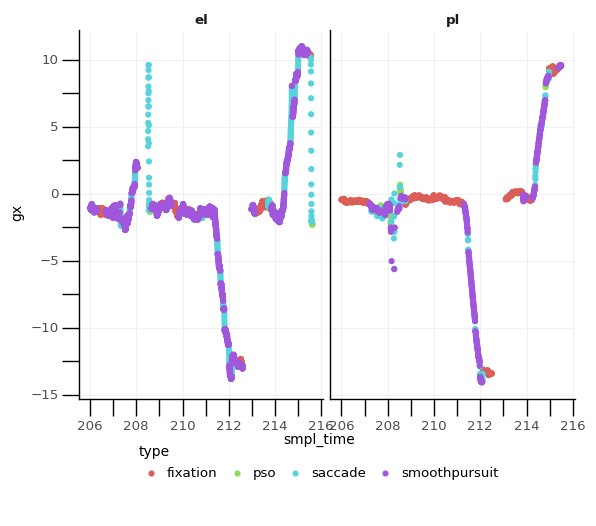

<ggplot: (8782185273334)>

In [107]:
(ggplot(tmpdata,aes(x='smpl_time',y='gx',color="type"))+
 geom_point()+
#annotate("vline",aes(xintercept="msg_time"),data=smooth_smooth.query(select+"&block==1&msg_time<=%i"%(start+dur)),)+
 facet_wrap("~eyetracker"))

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 765 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


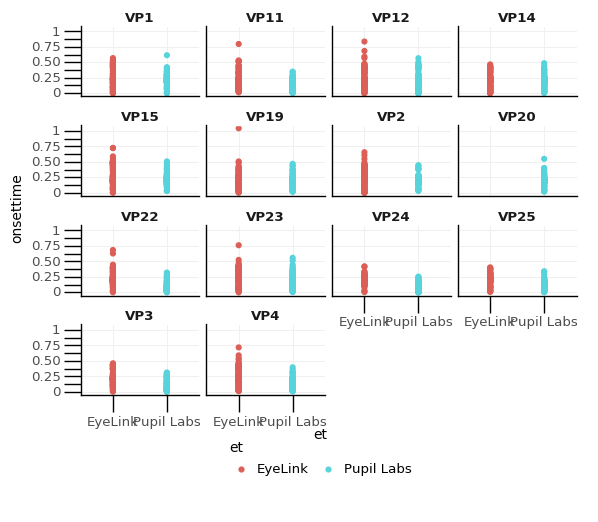

<ggplot: (-9223363254611362209)>

In [77]:
ggplot(smooth_smooth_first,aes(x="et",y="onsettime",color="et"))+geom_point()+facet_wrap("~subject")

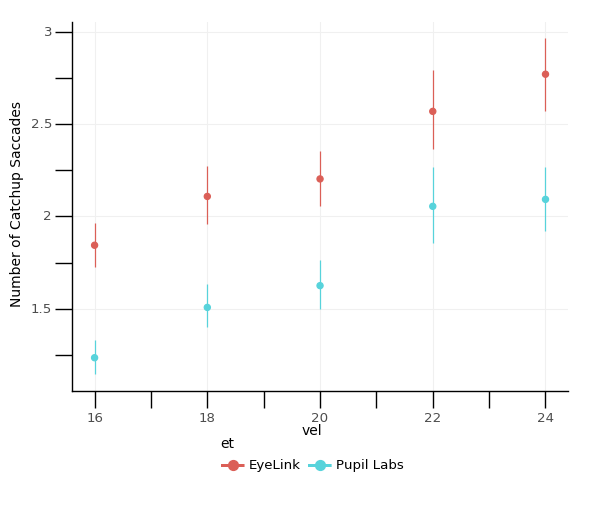

<ggplot: (8782242290987)>

In [32]:
smooth_saccade_agg = smooth_saccade.groupby(["subject","et","block","trial","angle","vel"],as_index=False).agg({'amplitude':np.mean})
ggplot(smooth_saccade_agg,aes(x="vel",y="amplitude",color="et"))+stat_summary()+ylab('Number of Catchup Saccades')

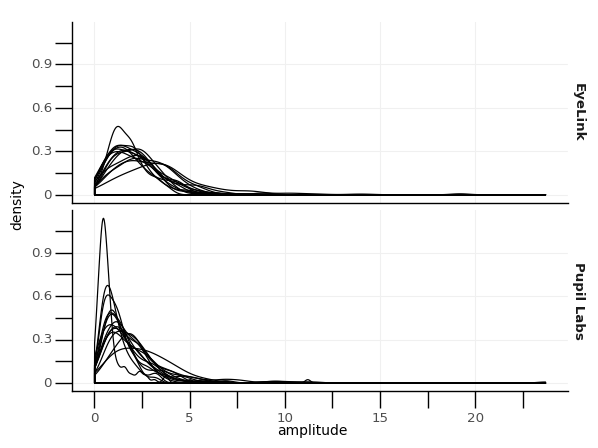

<ggplot: (-9223363254612595982)>

In [35]:
ggplot(smooth_saccade_agg,aes(x="amplitude",group="subject"))+geom_density()+facet_grid("et~.")